# Visualization

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
df_final= pd.read_csv(r"C:\Users\manhphi2811\OneDrive - National Economics University\Học Kỳ 6\Midterm\Final\df_final.csv")

In [3]:
df_final.head(5)

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group,Weekday
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,...,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-29),Monday
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,...,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-29),Monday
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,...,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-29),Wednesday
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,...,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-29),Wednesday
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,...,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-29),Thursday


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33966 entries, 0 to 33965
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orderid       33966 non-null  object
 1   cashier       33966 non-null  object
 2   saledate      33966 non-null  object
 3   total         33966 non-null  int64 
 4   customerid    33966 non-null  object
 5   ticketcode    33966 non-null  int64 
 6   date          33966 non-null  object
 7   time          33966 non-null  object
 8   slot          33966 non-null  object
 9   room          33966 non-null  int64 
 10  show_id       33966 non-null  object
 11  slot type     33966 non-null  object
 12  ticket type   33966 non-null  object
 13  ticket price  33966 non-null  int64 
 14  popcorn       33966 non-null  object
 15  DOB           33966 non-null  object
 16  Gender        33966 non-null  object
 17  Quận/Huyện    33966 non-null  object
 18  Tỉnh          33966 non-null  object
 19  job 

## Phân tích khách hàng

- Khách hàng trong bộ dữ liệu chủ yếu đến từ quận/huyện nào của Đà Nẵng?
- Khách hàng đi xem phim nhiều hơn là nam hay nữ?
- Nhóm khách hàng đi xem phim nhiều tập trung ở độ tuổi bao nhiêu? Làm công việc gì? Lĩnh vực gì?
- Khách hàng chọn thời gian nào trong ngày để đi xem phim?
- Khách hàng có xu hướng đi xem phim nhiều vào những ngày nào trong tuần?
- Loại vé, loại ghế ngồi được nhiều khách hàng lựa chọn là gì?
- Một khách hàng thường có xu hướng mua mấy vé? (Khách hàng đi xem phim một mình, với bạn, nhóm bạn hay với cơ quan nhiều?)
- Khách hàng đi xem phim có xu hướng mua popcorn hay không?
- Thể loại phim có nhiều khách hàng lựa chọn là gì? Đến từ đất nước nào? Có rating nào?


### Khách hàng theo quận huyện ở Đà Nẵng

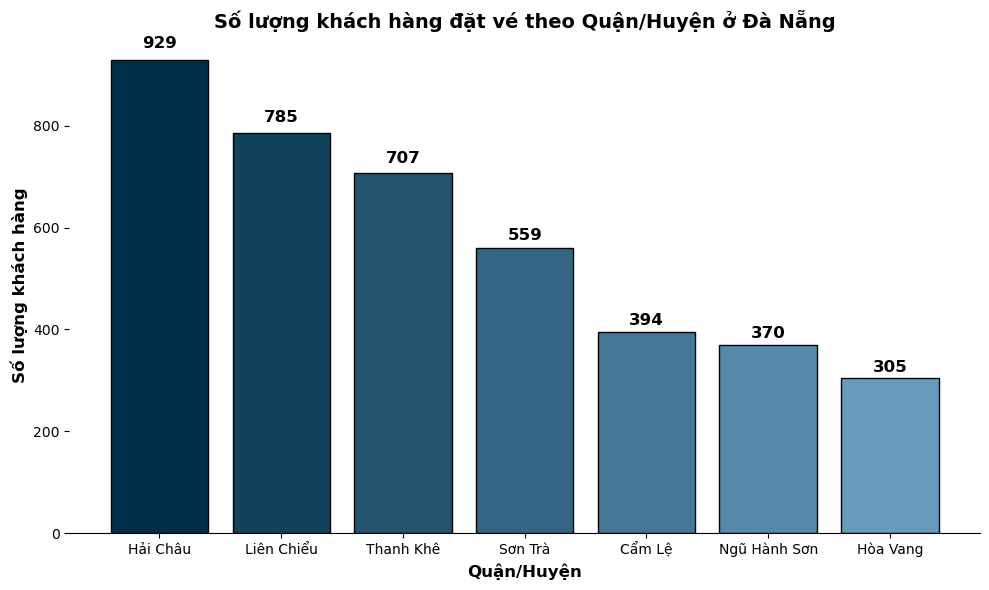

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Giữ lại mỗi khách hàng duy nhất
df_unique_customers = df_final.drop_duplicates(subset='customerid')

# Đếm số khách hàng theo Quận/Huyện
district_counts = df_unique_customers['Quận/Huyện'].value_counts()

# Tạo gradient màu từ #003049 (xanh đậm) đến #669BBC (xanh nhạt)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#003049', '#669BBC'])
gradient_colors = [mcolors.to_hex(cmap(i / (len(district_counts) - 1))) for i in range(len(district_counts))]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(district_counts.index, district_counts.values, color=gradient_colors, edgecolor='black')

# Tiêu đề và trục
plt.title('Số lượng khách hàng đặt vé theo Quận/Huyện ở Đà Nẵng', fontsize=14, fontweight='bold')
plt.xlabel('Quận/Huyện', fontsize=12, fontweight='bold')
plt.ylabel('Số lượng khách hàng', fontsize=12, fontweight='bold')
plt.xticks(rotation=360, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Thêm nhãn số trên cột (cách đỉnh một chút)
for index, value in enumerate(district_counts.values):
    plt.text(index, value + value * 0.02, str(value),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Làm đẹp biểu đồ (ẩn viền trên/phải/trái)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()


Thông thường đi mua vé, khách hàng thường có xu hướng một người mua cho cả nhóm, do đó trong bộ dataset này, có thể thấy thông tin của mỗi khách hàng được dùng nhiều lần cho số lượng vé mà khách hàng đó mua, sẽ rất khó để đưa ra cái nhìn chính xác và tổng quát khi chỉ ghi nhận được thông tin người mua, nhưng chúng ta có thể dựa vào đó để đưa ra những nhận xét mang tính gần đúng, ví dụ người mua đến từ Quận/huyện Hải Châu nhiều nhất, có thể xem như là Hải Châu có nhiều người mua vé nhất vì đây cũng là một trong những quận phát triển bậc nhất Đà Nẵng, hiện đại và có mức sống cao, những người đi chơi cùng với nhau có xu hướng cùng 1 khu. Và quận Hòa Vang là ít nhất, đây cũng là một quận không hiện đại và được đầu tư nhiều như các quận khác.

### Tỷ lệ khách hàng theo giới tính

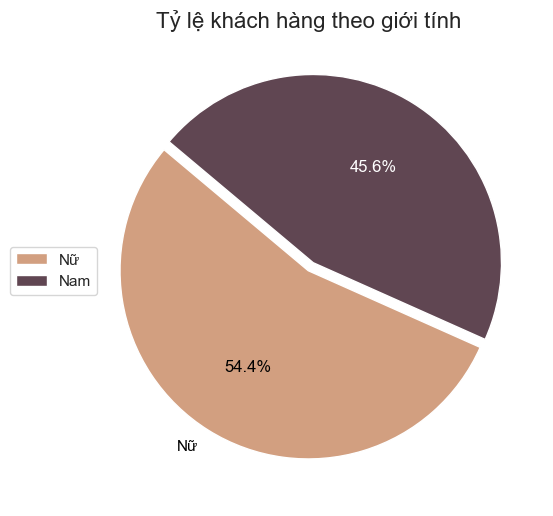

In [6]:

sns.set_theme(style="whitegrid")

counts = df_unique_customers['Gender'].value_counts()
labels = counts.index

colors = ['#604652' if label == 'Nam' else '#D29F80' for label in labels]
explode = [0.05 if label == 'Nam' else 0 for label in labels]

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    textprops={'color': 'black'}
)

# Đổi màu chữ "Nam" trong nhãn (texts) thành trắng
for i, label in enumerate(labels):
    if label == 'Nam':
        texts[i].set_color('white')  # nhãn "Nam"
        autotexts[i].set_color('white')  # phần trăm "Nam" (nếu muốn)

# Thêm bảng chú giải (legend)
plt.legend(wedges, labels, title="Giới Tính", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tiêu đề
plt.title('Tỷ lệ khách hàng theo giới tính', fontsize=16)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-0.15,0.5), loc='center left')

# Font
plt.rcParams['font.family'] = 'Times New Roman'

plt.show()


Giới tính khách hàng không có sự khác biệt quá lớn, nam giới và nữ giới khá gần nhau, nhưng nữ giới vẫn nhỉn hơn nam giới.

### Phân bố người theo nhóm tuổi, nghề nghiệp, lĩnh vực

C:\Users\manhphi2811\AppData\Local\Temp\ipykernel_13156\2246505877.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_customers['Age Group'] = pd.Categorical(


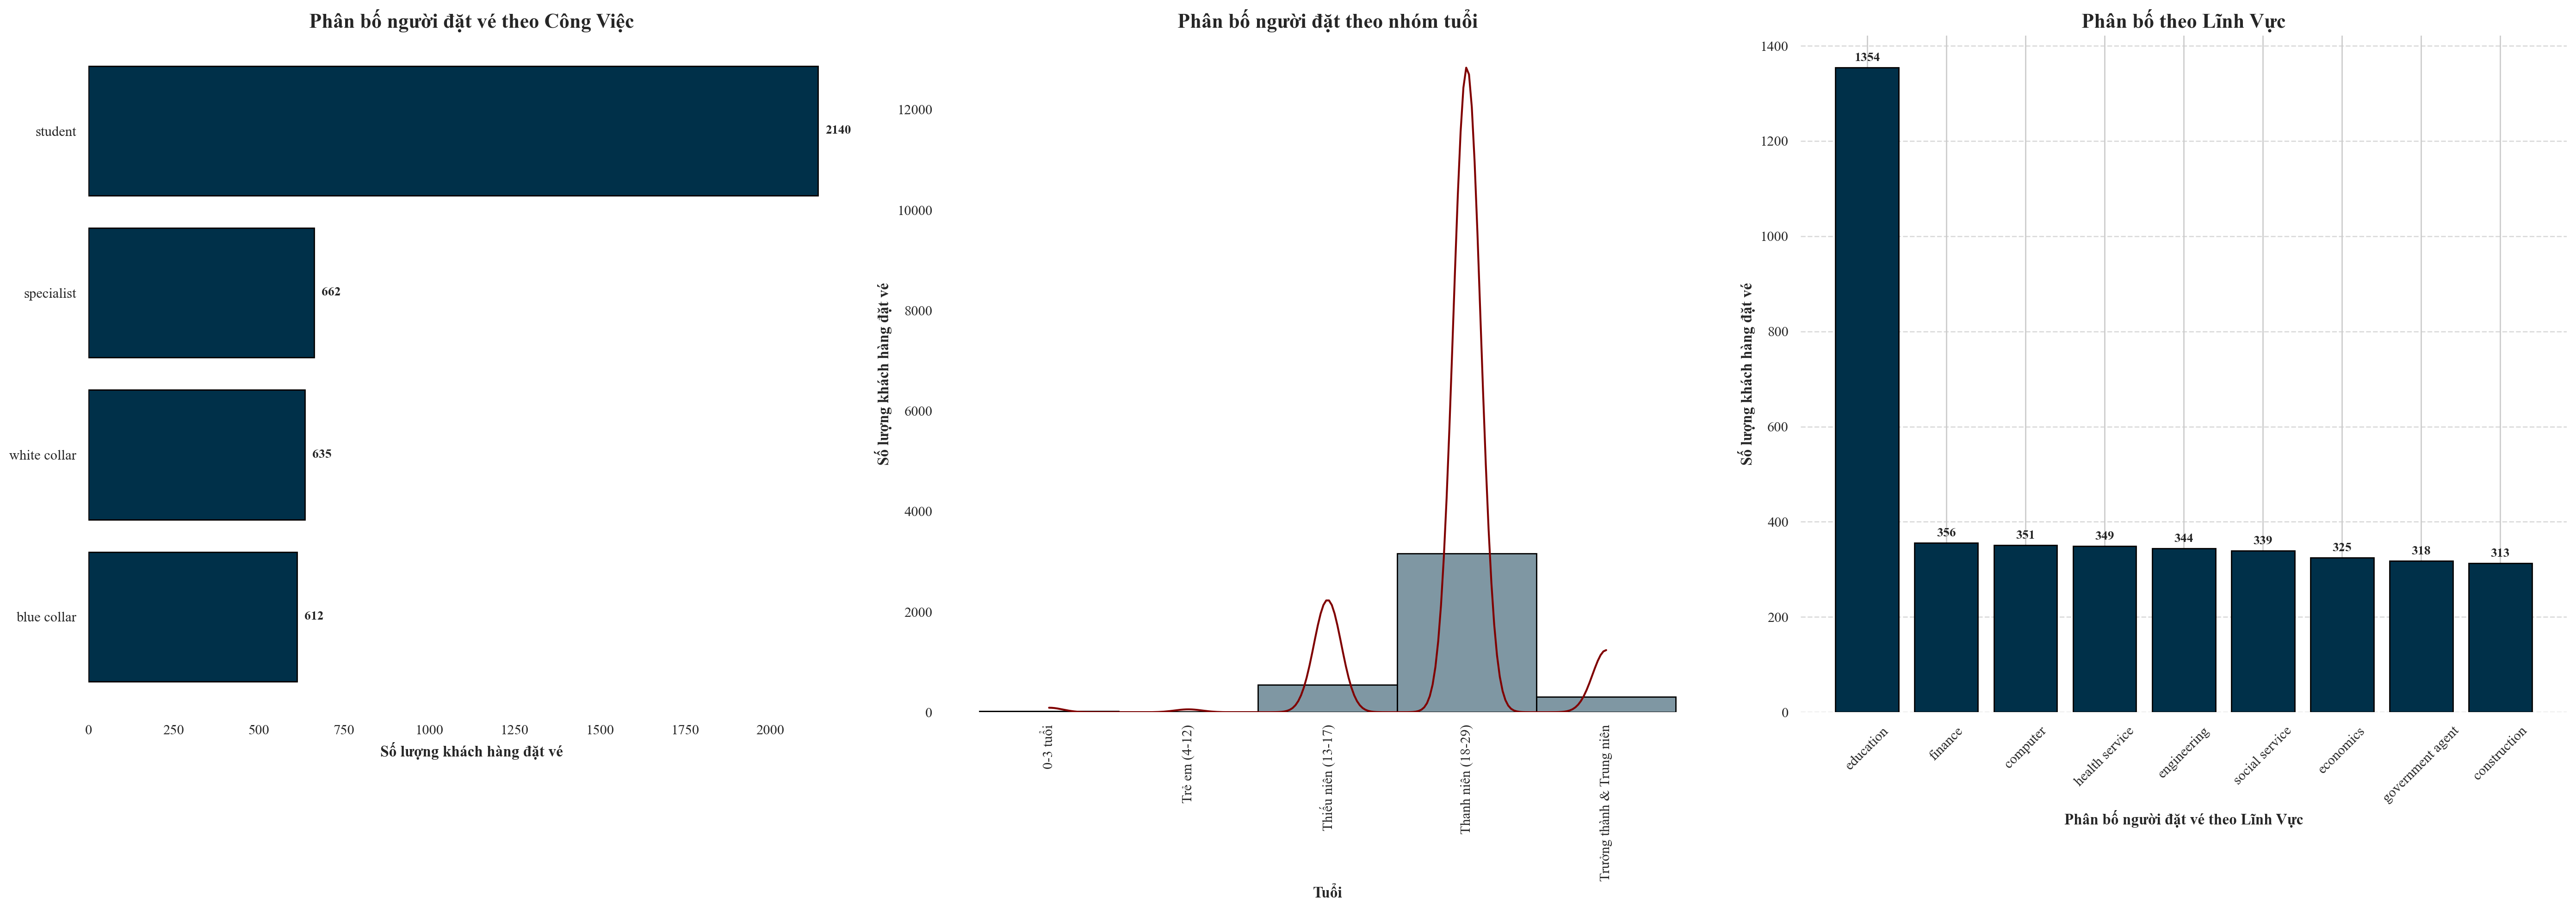

In [7]:
# Thiết lập giao diện
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
# Tạo biểu đồ 3 phần: Công việc, Độ tuổi, Lĩnh vực
fig, axs = plt.subplots(1, 3, figsize=(28, 10), dpi=200)
axs = axs.flatten()

# Chart 1: Phân bố theo công việc
cinema_jobs = df_unique_customers['job'].value_counts()
axs[0].barh(cinema_jobs.index, cinema_jobs.values, color='#003049', edgecolor='black')
axs[0].set_title('Phân bố người đặt vé theo Công Việc', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Số lượng khách hàng đặt vé', fontsize=12, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=11, labelrotation=0)
axs[0].invert_yaxis()
axs[0].grid(False)
for i, v in enumerate(cinema_jobs.values):
    axs[0].text(v + max(cinema_jobs.values)*0.01, i, str(v), va='center', fontsize=10, fontweight='bold')
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Chart 2: Phân bố theo độ tuổi
age_order = [
    '0-3 tuổi', 'Trẻ em (4-12)', 'Thiếu niên (13-17)', 'Thanh niên (18-29)',
    'Trưởng thành & Trung niên'
]

df_unique_customers['Age Group'] = pd.Categorical(
    df_unique_customers['Age Group'],
    categories=age_order,
    ordered=True
)

cinema_sorted = df_unique_customers.sort_values(by='Age Group')
sns.histplot(
    data=cinema_sorted,
    x='Age Group',
    kde=True,
    bins=60,
    color='#003049',
    edgecolor='black',
    ax=axs[1], 
)
axs[1].lines[0].set_color('maroon')
axs[1].set_title('Phân bố người đặt theo nhóm tuổi', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Tuổi', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Số lượng khách hàng đặt vé', fontsize=12, fontweight='bold')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(False)
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Chart 3: Phân bố theo lĩnh vực
cinema_industry = df_unique_customers['industry'].value_counts()
axs[2].bar(cinema_industry.index, cinema_industry.values, color='#003049', edgecolor='black')
axs[2].set_xlabel('Phân bố người đặt vé theo Lĩnh Vực', fontsize=12, fontweight='bold')
axs[2].set_ylabel('Số lượng khách hàng đặt vé', fontsize=12, fontweight='bold')
axs[2].set_title('Phân bố theo Lĩnh Vực', fontsize=16, fontweight='bold')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(cinema_industry.values):
    axs[2].text(i, v + max(cinema_industry.values)*0.01, str(v), ha='center', fontsize=10, fontweight='bold')
for spine in axs[2].spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

- Số lượng sinh viên đặt vé nhiều nhất là học sinh, cũng như thuộc độ tuổi từ 18-25, đây là độ tuổi vui chơi và có khả năng tự chủ về mặt tài chính, thích tụ tập, đi chơi nhiều với bạn bè. 
- Bên cạnh đó có thể thấy có sự xuất hiện của những nhóm tuổi 0,1,2,3, sau khi tìm hiểu thì đây giống như hình thức trường học, cơ quan tổ chức đi xem phim, do đó có những độ tuổi khác nhau nên người mua vé đã điền sai.

In [8]:
# Xoá trùng lặp theo customer_id
df_unique = df_final.drop_duplicates(subset='customerid')

# Đếm số lượng khách hàng theo độ tuổi
age_counts = df_unique.groupby('Age')['customerid'].count().reset_index()

# Đổi tên cột
age_counts.columns = ['Độ tuổi', 'Số lượng khách hàng']

# Sắp xếp tuổi theo thứ tự tăng dần 
age_counts = age_counts.sort_values(by='Độ tuổi').reset_index(drop=True)

#Tính tổng số lượng khách hàng
sum_cus = sum(age_counts['Số lượng khách hàng'])

# Bảng kết quả
print(age_counts)
print(f"Tổng: {' ' * 21} {sum_cus}")

    Độ tuổi  Số lượng khách hàng
0         0                    2
1         1                   10
2         2                    8
3         3                    2
4        10                    1
5        11                    6
6        12                    7
7        13                   26
8        14                   37
9        15                  103
10       16                  163
11       17                  221
12       18                  324
13       19                  368
14       20                  352
15       21                  367
16       22                  366
17       23                  316
18       24                  288
19       25                  230
20       26                  192
21       27                  158
22       28                  124
23       29                   74
24       30                   52
25       31                   44
26       32                   24
27       33                   23
28       34                   29
29       3

### ARPC, ARPO


In [9]:
# Tính tổng doanh thu
## Xoá trùng lặp orderid để mỗi đơn hàng chỉ tính 1 lần
df_orders = df_final.drop_duplicates(subset='orderid')

## Tính tổng doanh thu từ các đơn hàng duy nhất
total_revenue = df_orders['total'].sum()

# Tính doanh thu trung bình trên một khách hàng
averg_revenue_per_customer = total_revenue / sum_cus

# Kết quả
print(f"Doanh thu trung bình trên một khách hàng là: {averg_revenue_per_customer:,.0f} VND")

Doanh thu trung bình trên một khách hàng là: 398,689 VND


In [10]:
# Tính doanh thu trung bình trên một đơn hàng
averg_revenue_per_order = total_revenue / len(df_orders)

# Hiển thị kết quả
print(f"Doanh thu trung bình trên một đơn hàng là: {averg_revenue_per_order:,.0f} VND")


Doanh thu trung bình trên một đơn hàng là: 115,571 VND


### Phân bố khách hàng theo giờ

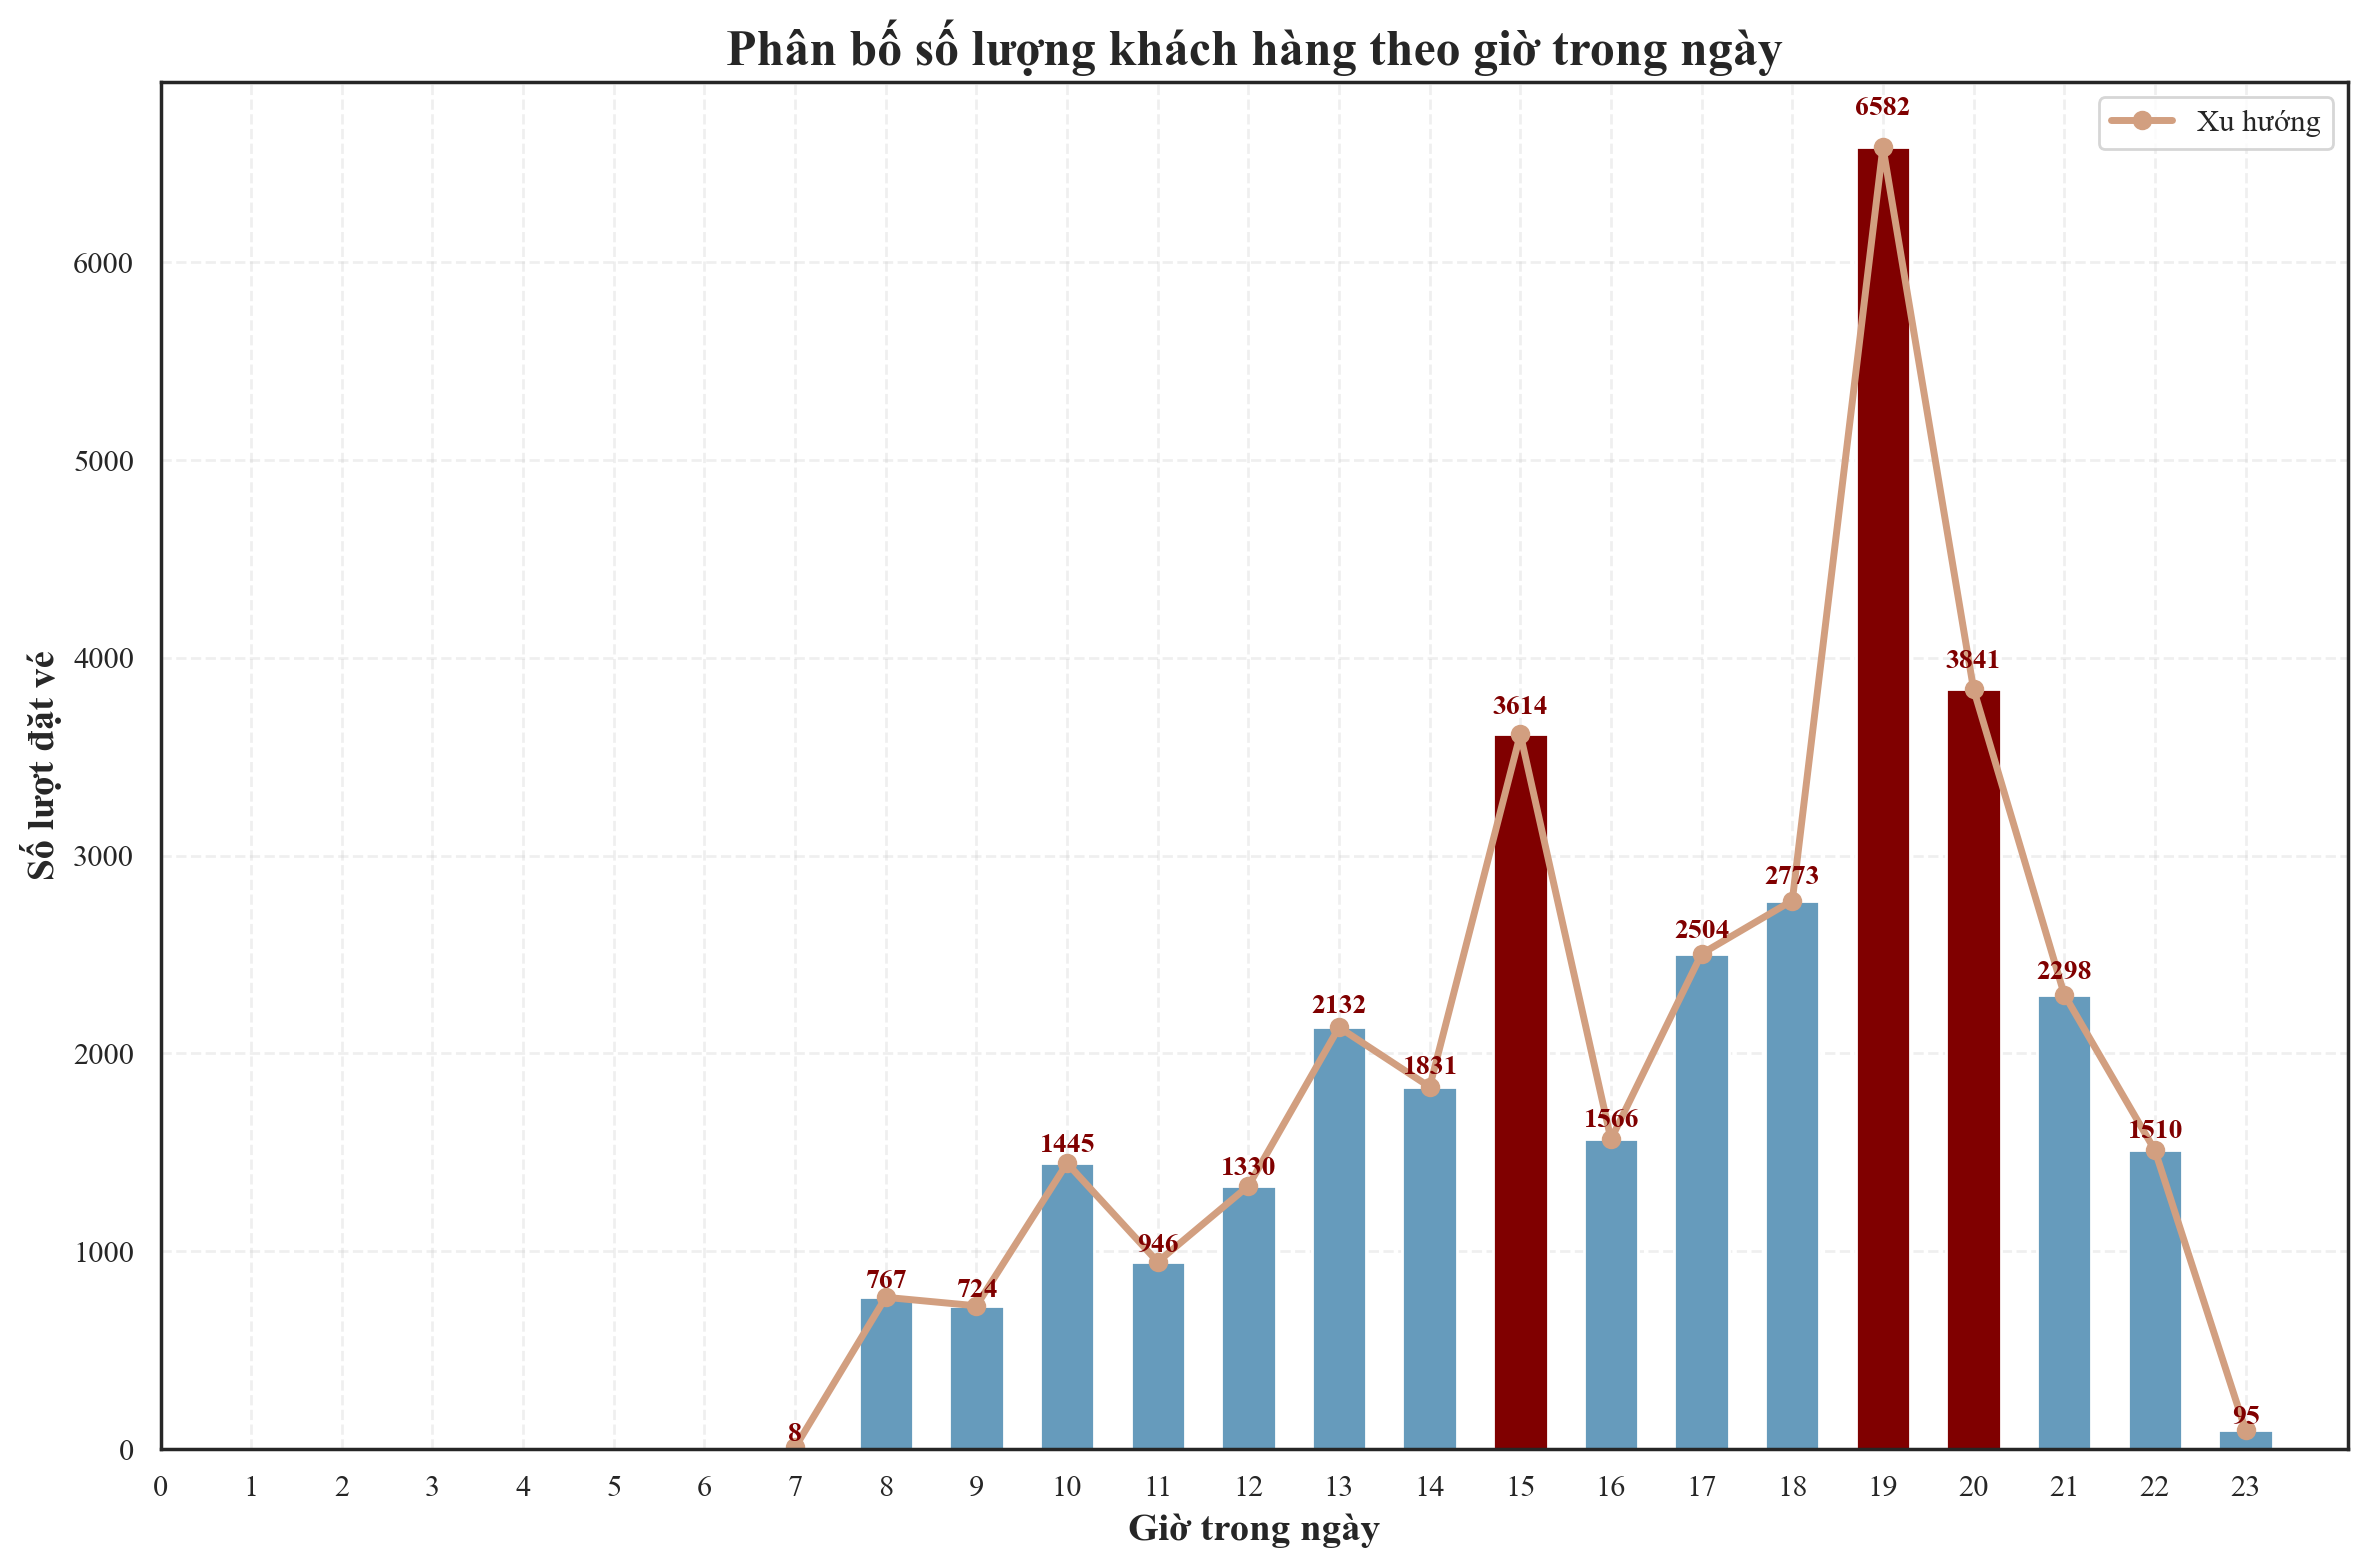

In [11]:

sns.set_theme(style="white")
plt.rcParams['font.family'] = 'Times New Roman'

# Chuyển đổi cột 'time' sang kiểu datetime nếu chưa
df_final['time'] = pd.to_datetime(df_final['time'], errors='coerce')
df_final['hour'] = df_final['time'].dt.hour

# Đếm số lượng vé bán theo từng giờ trong ngày
hour_counts = df_final['hour'].value_counts().sort_index()

# Tìm top 3 giờ cao nhất
top3_hours = hour_counts.sort_values(ascending=False).head(3).index

# Gán màu: đậm cho top 3, nhạt cho còn lại
bar_colors = ['maroon' if hour in top3_hours else '#669BBC' for hour in hour_counts.index]

# Tạo biểu đồ
plt.figure(figsize=(12, 8), dpi=200)
bars = plt.bar(hour_counts.index, hour_counts.values, color=bar_colors, width=0.6)

# Vẽ line trend
plt.plot(hour_counts.index, hour_counts.values, color='#D29F80', linewidth=2.5, marker='o', label='Xu hướng')

# Thêm số lên đầu cột, cách đỉnh 3% chiều cao
for x, y in zip(hour_counts.index, hour_counts.values):
    plt.text(x, y + y*0.02, str(y), ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='maroon')


# Cấu hình biểu đồ
plt.title('Phân bố số lượng khách hàng theo giờ trong ngày', fontsize=18, fontweight='bold')
plt.xlabel('Giờ trong ngày', fontsize=14, fontweight='bold')
plt.ylabel('Số lượt đặt vé', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


Giờ cao điểm rơi vào khoảng từ 3-4 giờ chiều và cao nhất vào khoảng 6-8 giờ tối, tại hai thời điểm này, số lượng vé bán ra là cao nhất, và để đẩy mạnh các khung giờ khác, tránh bị trống ghế, tại các khung giờ khác như buổi sáng hay chiều, có thể đưa ra các chương trình khuyến mãi để thu hút thêm người xem.

Số lượng vé bán vào các ngày trong tháng 5 có xu hướng không được đồng đều, nhìn vào biểu đồ có thể thấy các vấn đề sau:
- Số lượng vé bán cao nhất vào ngày 10-13 của tháng, mặc dù đây là tháng 5 nhưng đây thường là những ngày lãnh lương của người đi làm, nên có xu hướng mua vé xem phim nhiều và thấp dần vào thời gian cuối tháng.
- Ngày 03/05 có doanh thu thấp nhất, sau khi tìm hiểu đây chính là ngày quốc tang để tỏ lòng tưởng nhớ đồng chí Đại tướng Lê Đức Anh, nên mọi hoạt động vui chơi giải trí trong ngày hôm ấy phải hoãn lại đó cũng là lý do số lượng khách hàng lại giảm mạnh như vậy.

Cao nhất vào Thứ 5 và Chủ nhật, Chủ Nhật là ngày cuối tuần nên khách hàng nhiều là điều dễ hiểu, còn thứ 5, có thể do các rạp chiếu phim thường có những hoạt động khuyến mãi, giảm giá vào thứ 5.

Mọi khách hàng đến mua vé đều là vé thành viên và lựa chọn ghế đơn nhiều hơn ghế đôi

khách hàng thường đi một mình hoặc đi nhóm 2 người là chủ yếu.

### Khách hàng đi theo nhóm

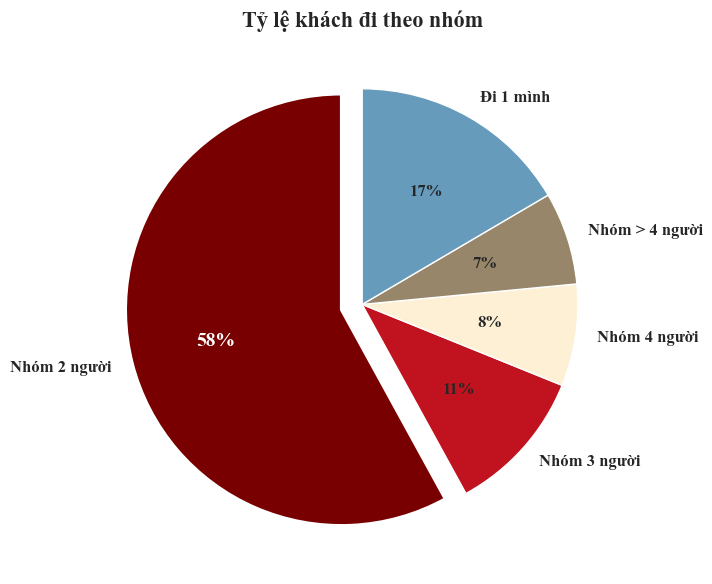

In [12]:
import matplotlib.pyplot as plt

# Tính số người trong mỗi đơn hàng
order_size = df_final.groupby('orderid')['customerid'].count()

# Phân loại nhóm người
def classify_group(n):
    if n == 1:
        return "Đi 1 mình"
    elif n == 2:
        return "Nhóm 2 người"
    elif n == 3:
        return "Nhóm 3 người"
    elif n == 4:
        return "Nhóm 4 người"
    else:
        return "Nhóm > 4 người"

group_df = order_size.reset_index(name='group_size')
group_df['group_label'] = group_df['group_size'].apply(classify_group)

# Tỷ lệ theo nhóm người
group_ratio = group_df['group_label'].value_counts(normalize=True).sort_index() * 100

# Màu cho từng nhóm
colors = ['#780000', '#C1121F', '#FDF0D5', '#97866A', '#669BBC']
highlight_label = "Nhóm 2 người"

# Tăng "explode" cho nhóm 2 người để nó to và nổi hơn
explode = [0.10 if label == highlight_label else 0 for label in group_ratio.index]

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(14, 6))

# Vẽ pie chart
wedges, texts, autotexts = ax.pie(
    group_ratio,
    labels=group_ratio.index,
    autopct='%1.0f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Làm nổi phần trăm của nhóm 2 người
for i, label in enumerate(group_ratio.index):
    if label == highlight_label:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14)
        autotexts[i].set_fontweight('bold')
        wedges[i].set_linewidth(2)
        wedges[i].set_edgecolor('white')

# Tiêu đề
ax.set_title("Tỷ lệ khách đi theo nhóm", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()



### Phân phối khách hàng ứng với số lượng vé đã đặt

#### Nhận xét: Ta thấy chỉ số ARPU lớn hơn so với mức chi trung bình của người Việt Nam cho việc xem phim chiếu rạp. Ta sẽ đi phân tích số lượng vé đã đặt theo mã khách hàng để làm rõ nguyên nhân:

In [13]:
# Đếm số lượng vé đã đặt theo mã khách hàng
ord_by_cus_counts = df_final.groupby('customerid')['ticketcode'].count().reset_index()

# Đổi tên cột
ord_by_cus_counts.columns = ['Mã khách hàng', 'Số lượng vé đã đặt']

# Sắp xếp theo số lượng khách hàng của từng lĩnh vực
ord_by_cus_sorted = ord_by_cus_counts.sort_values(by='Số lượng vé đã đặt', ascending=False)

# Tỷ trọng số lượng vé đã đặt của từng khách hàng
total_tickets = df_final['ticketcode'].count()
ord_by_cus_sorted['Tỷ trọng(%)'] = ord_by_cus_sorted['Số lượng vé đã đặt'] / total_tickets * 100

# Bảng kết quả
print(ord_by_cus_sorted)

     Mã khách hàng  Số lượng vé đã đặt  Tỷ trọng(%)
3941     KH6166700               10132    29.829830
615     0000029127                7105    20.917977
2161    0001121703                 507     1.492669
3878     KH3742976                  54     0.158983
3624    0003004563                  52     0.153094
...            ...                 ...          ...
3423    0001186401                   1     0.002944
3116    0001167409                   1     0.002944
2246    0001122753                   1     0.002944
2243    0001122724                   1     0.002944
2024    0001119755                   1     0.002944

[4049 rows x 3 columns]


Một số khách hàng đặt mua vé với số lượng lớn cụ thể là ba mã Khách hàng KH6166700, 0000029127, 0001121703.

Phỏng đoán: những khách hàng này có thể là doanh nghiệp, tổ chức sự kiện, bên thứ 3 đặt vé theo lô/bán lại. Để tìm hiểu kỹ hơn, chúng ta sẽ xem lượng vé mua theo ngày của ba mã khách hàng này.

In [14]:
# Đếm số lượng vé đã đặt theo ngày của nhóm khách hàng đã đặt mua số lượng lớn

## Tạo danh sách 3 khách hàng 
selected_cus = ['KH6166700', '0000029127', '0001121703']

## Lọc dữ liệu 3 khách hàng
filt_df = df_final[df_final['customerid'].isin(selected_cus)]

ord_by_cus_counts_day = filt_df.groupby(['customerid','saledate'])['ticketcode'].count().reset_index()

## Đổi tên cột 
ord_by_cus_counts_day.columns = ['Mã khách hàng', 'Ngày bán', 'Số lượng vé đã đặt']

# Hiển thị kết quả
print(ord_by_cus_counts_day)

   Mã khách hàng    Ngày bán  Số lượng vé đã đặt
0     0000029127  2019-05-02                 158
1     0000029127  2019-05-03                  13
2     0000029127  2019-05-05                 239
3     0000029127  2019-05-06                 330
4     0000029127  2019-05-07                 256
..           ...         ...                 ...
75     KH6166700  2019-05-27                 221
76     KH6166700  2019-05-28                 153
77     KH6166700  2019-05-29                 149
78     KH6166700  2019-05-30                 125
79     KH6166700  2019-05-31                 371

[80 rows x 3 columns]


Ba mã khách hàng 0000029127, 0001121703, và KH6166700 đều có số lượng vé mua mỗi ngày rất lớn (có ngày hơn 300 vé), điều này cho thấy đây không phải là khách hàng cá nhân thông thường. Đây có thể là đối tác doanh nghiệp (B2B) hoặc đại lý bán vé, đặt nhiều vé cùng lúc cho nhân viên, trường học, tổ chức, hoặc các chương trình nhóm. Điều này dẫn đến ARPC bị đội lên cao và không phản ánh đúng hành vi của khách hàng cá nhân thông thường.

#### Tần suất xem phim của khách hàng

In [15]:
# Loại trùng lặp giữa customerid và saledate
df_unique_visits = df_final.drop_duplicates(subset=['customerid', 'saledate'])

# Đếm số lần đến rạp (tức là số ngày khác nhau mỗi khách có giao dịch)
visit_counts = df_unique_visits['customerid'].value_counts().reset_index()
visit_counts.columns = ['customerid', 'visit_count']

print(visit_counts)

# Bảng phân phối tần suất khách đến rạp
count_distribution = visit_counts['visit_count'].value_counts().reset_index()
count_distribution.columns = ['Số lần đến rạp trong tháng','Số khách hàng']
print(count_distribution)

           customerid  visit_count
0           KH6166700           30
1          0000029127           29
2          0001121703           21
3          0001185815            9
4          0003009632            8
...               ...          ...
4044       0001077981            1
4045       0001077993            1
4046       0001078009            1
4047       0001078025            1
4048  WEBS00000046015            1

[4049 rows x 2 columns]
    Số lần đến rạp trong tháng  Số khách hàng
0                            1           2998
1                            2            727
2                            3            213
3                            4             69
4                            5             27
5                            6              8
6                            7              2
7                           30              1
8                           29              1
9                           21              1
10                           9              1
11 

Ta nhận thấy phần lớn khách hàng chỉ đến rạp 1-2 lần trong một tháng. Cụ thể, có 2.998 khách hàng (chiếm tỷ lệ rất lớn) chỉ đến 1 lần, và 727 khách đến 2 lần. Tần suất khách hàng đến rạp từ 3 lần trở lên trong tháng giảm dần. Bảng phân phối cho thấy hành vi tiêu dùng chủ yếu là không thường xuyên, phản ánh một tệp khách hàng vãng lai là chính.

Đặc biệt ba mã khách hàng 0000029127, 0001121703, và KH6166700 đến rạp rất nhiều lần trong tháng và mỗi lần đều mua số lượng vé rất lớn.

#### Phân phối số lượng khách hàng ứng với số lượng vẽ đã đặt

In [16]:
# Đếm số lượng khách hàng ứng với số vẽ đã đặt
num_cus_by_ord = ord_by_cus_counts.groupby('Số lượng vé đã đặt')['Mã khách hàng'].count().reset_index()

# Đổi tên cột
num_cus_by_ord.columns = ['Số lượng vé đã đặt', 'Số lượng khách hàng']

# Kết quả
print(num_cus_by_ord)

    Số lượng vé đã đặt  Số lượng khách hàng
0                    1                  357
1                    2                 1532
2                    3                  433
3                    4                  639
4                    5                  263
5                    6                  242
6                    7                  134
7                    8                  126
8                    9                   68
9                   10                   58
10                  11                   32
11                  12                   25
12                  13                   30
13                  14                   25
14                  15                   20
15                  16                   16
16                  17                    8
17                  18                    6
18                  19                    8
19                  20                    2
20                  21                    4
21                  22          

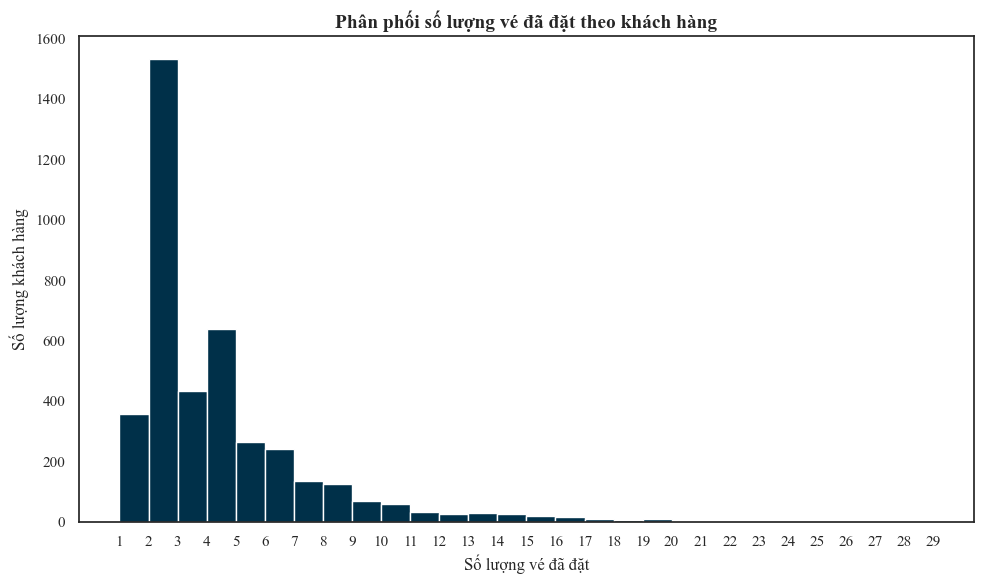

In [17]:
# Kích thước biểu đồ
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ tần suất
plt.hist(
    ord_by_cus_counts['Số lượng vé đã đặt'],
    bins=range(1, 30),
    color='#003049',      # Màu cột
    edgecolor='white'     # Đường viền cột
)
# Tên trục
plt.title('Phân phối số lượng vé đã đặt theo khách hàng', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng vé đã đặt', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

plt.xticks(range(1, 30))  # Hiển thị đầy đủ trục x
plt.tight_layout()
plt.show()

### Số lượt vé bán ra và tỉ lệ lượt xem theo thể loại phim

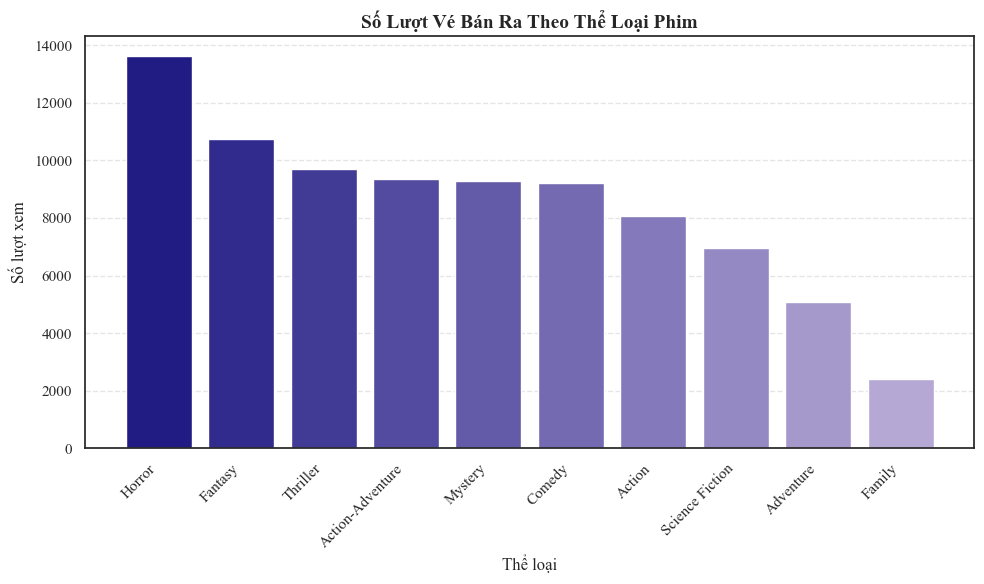

In [18]:

# Tách thể loại thành từng dòng
all_genres = df_final['listed_in'].str.split(',').explode().str.strip()

# Đếm số lượt xem mỗi thể loại
genre_counts = all_genres.value_counts().sort_values(ascending=False)

# Lấy Top 10 thể loại phổ biến nhất
top_genres = genre_counts.head(10)

# Tạo gradient màu từ #003049 (xanh đậm) đến #669BBC (xanh nhạt)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#211C84', '#B5A8D5'])
gradient_colors = [mcolors.to_hex(cmap(i / 9)) for i in range(10)]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(top_genres.index, top_genres.values, color=gradient_colors)

plt.title("Số Lượt Vé Bán Ra Theo Thể Loại Phim", fontsize=14, fontweight='bold')
plt.xlabel("Thể loại", fontsize=12)
plt.ylabel("Số lượt xem", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


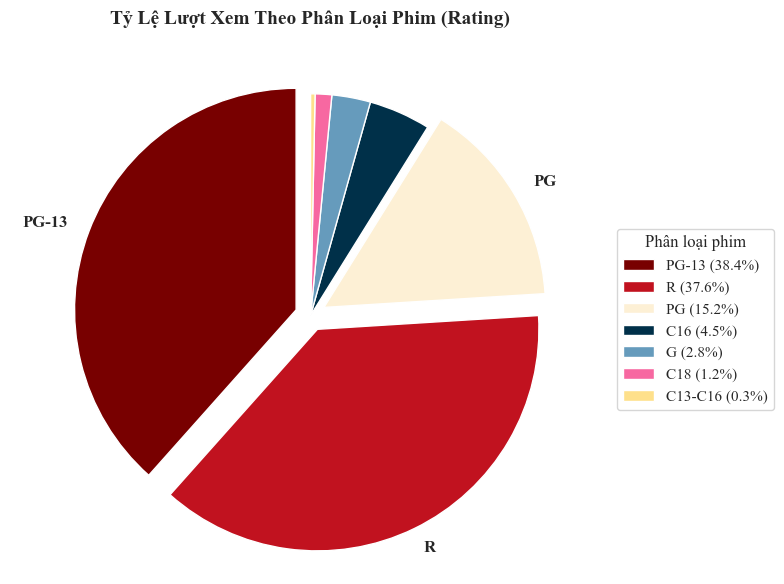

In [19]:
# Tính phần trăm lượt xem theo rating
rating_percent = df_final['rating'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Lấy top 3 thể loại lớn nhất
top3 = rating_percent.head(3).index.tolist()

# Gắn label cho top 3, còn lại để trống
labels = [label if label in top3 else '' for label in rating_percent.index]

# Danh sách label cho legend: "PG-13 (38.4%)"
legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(rating_percent.index, rating_percent.values)]

# Màu sắc tùy chọn (đảm bảo đủ số màu)
base_colors = ['#780000', '#C1121F', '#FDF0D5', '#003049', '#669BBC', '#f768a1', '#fee08b']
colors = base_colors * (len(rating_percent) // len(base_colors) + 1)
colors = colors[:len(rating_percent)]

# Tách (explode) 3 phần lớn nhất ra
explode = [0.07 if label in top3 else 0 for label in rating_percent.index]

# Vẽ pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    rating_percent,
    labels=labels,
    explode=explode,
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Legend bên phải
plt.legend(legend_labels, title="Phân loại phim", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Tiêu đề và căn chỉnh
plt.title("Tỷ Lệ Lượt Xem Theo Phân Loại Phim (Rating)", fontsize=14, pad=30, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Thị hiếu quốc gia phim của Khách hàng

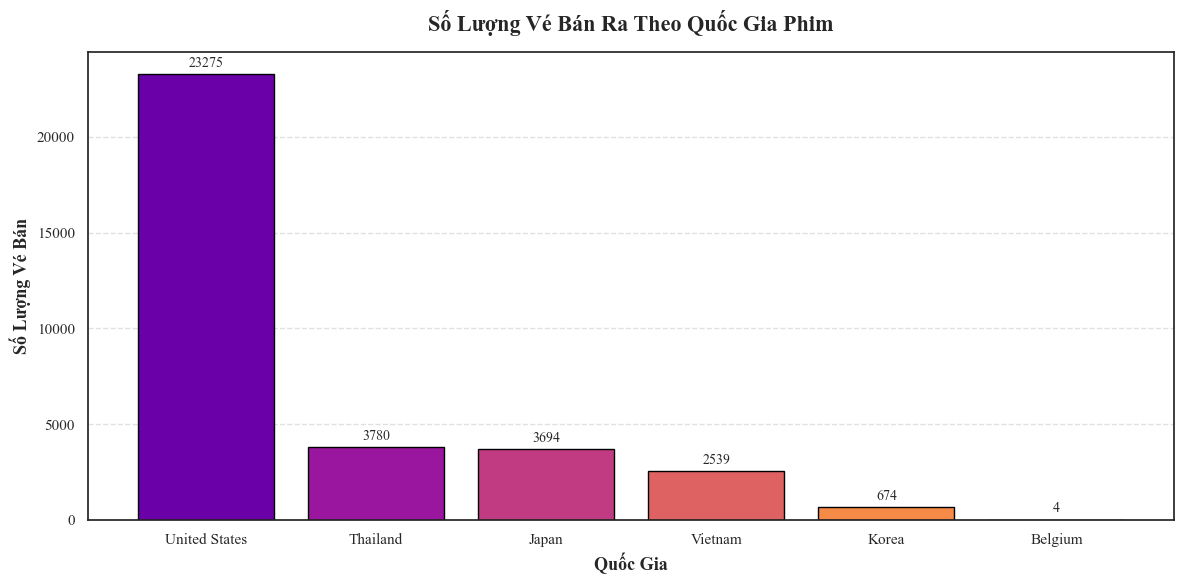

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo một danh sách các quốc gia từ tất cả các dòng trong cột 'country'
all_countries = df_final['country'].explode().value_counts()

# Thiết lập dải màu gradient
colors = plt.cm.plasma(np.linspace(0.2, 0.85, len(all_countries)))

# Tạo figure và vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(all_countries.index, all_countries.values, color=colors, edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Số Lượng Vé Bán Ra Theo Quốc Gia Phim', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Quốc Gia', fontsize=13, fontweight='bold')
plt.ylabel('Số Lượng Vé Bán', fontsize=13, fontweight='bold')
plt.xticks(rotation=360, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Thêm nhãn số liệu lên từng cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(all_countries.values)*0.01,
             f'{height}', ha='center', va='bottom', fontsize=10)

# Bố cục gọn gàng
plt.tight_layout()
plt.show()


## Phân tích doanh nghiệp

#### __DOANH THU THEO NGÀY TRONG TUẦN CỦA THÁNG 5/2019__

In [21]:
# chuyển đổi kiểu dữ liệu từ object sang kiểu datetime
df_final['saledate'] = pd.to_datetime(df_final['saledate'])
df_final['weekday'] = df_final['saledate'].dt.dayofweek  # 0=Monday, 6=Sunday
# bỏ năm đi (2019) trong saledate
df_final['saledate'] = df_final['saledate'].dt.strftime('%m-%d')
# doanh thu được nhóm theo các thứ trong tuần
total_weekday = df_final.groupby("weekday")['ticket price'].sum()
pd.DataFrame(total_weekday)
total_weekday = total_weekday.reset_index()
total_weekday
# tạo màu cho biểu đồ
# Khởi tạo màu mặc định
custom_colors = ['#669BBC'] * len(total_weekday)

# Tìm vị trí max / min
max_idx = total_weekday['ticket price'].values.argmax()
min_idx = total_weekday['ticket price'].values.argmin()

# Highlight màu
custom_colors[max_idx] = '#C1121F'  
custom_colors[min_idx] = '#C1121F'  

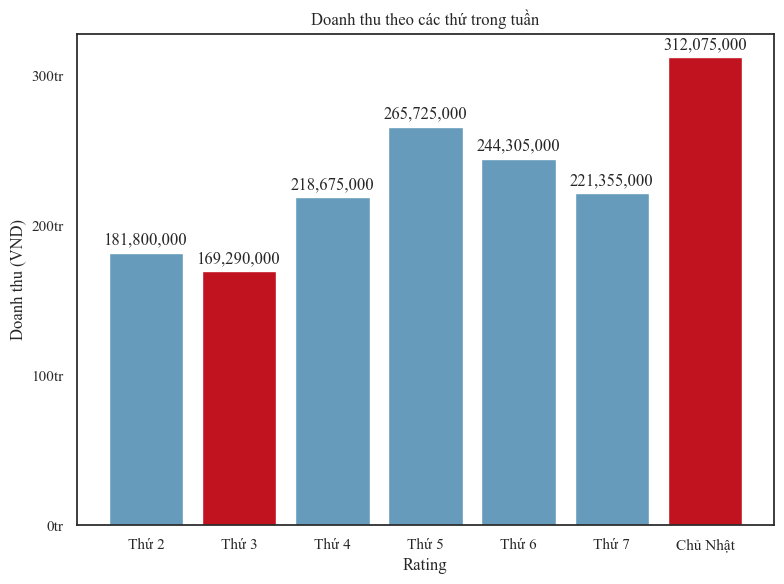

In [22]:
# biểu đồ cột cho doanh thu theo các thứ trong tuần 
fig, ax = plt.subplots(figsize=(8, 6))

weekday_labels = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ Nhật']
total_weekday_barplot = ax.bar(weekday_labels, total_weekday['ticket price'], 
                               color=custom_colors)

ax.set_title("Doanh thu theo các thứ trong tuần")
ax.set_xlabel("Rating")
ax.yaxis.set_major_locator(ticker.MultipleLocator(100_000_000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) : thêm tick nhỏ hơn trên yxis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax.bar_label(total_weekday_barplot, labels=[f"{v:,}" for v in total_weekday['ticket price']], padding=3)
ax.set_ylabel("Doanh thu (VND)")

plt.tight_layout()
plt.show()

#### __DOANH THU THEO KHÁCH HÀNG LIỆU CÓ MUA BỎNG NGÔ HAY KHÔNG__

In [23]:
total_popcorn = df_final.groupby('popcorn')['ticket price'].sum()
print(total_popcorn)

popcorn
Có          4755000
Không    1608470000
Name: ticket price, dtype: int64


Text(0.5, 1.0, 'Tỷ lệ doanh thu theo khách hàng liệu có mua bỏng ngô hay không')

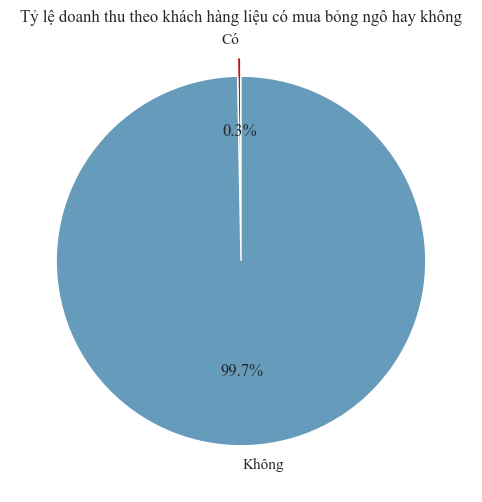

In [24]:
colors = ['#C1121F', '#669BBC', '#FDCB6E', '#00B894', '#6C5CE7']

explode = [0.1 if v/total_popcorn.values.sum() < 0.02 else 0 for v in total_popcorn.values]

fig, ax = plt.subplots(figsize=(8,6))

ax.pie(
    total_popcorn.values, 
    labels=total_popcorn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)
ax.set_title("Tỷ lệ doanh thu theo khách hàng liệu có mua bỏng ngô hay không")

#### __DOANH THU THEO GIỚI TÍNH__

In [25]:
# doanh thu được nhóm theo giới tính (nam, nữ)
total_bysex = df_final.groupby('Gender')['ticket price'].sum()
print(total_bysex)

Gender
Nam     346880000
Nữ     1266345000
Name: ticket price, dtype: int64


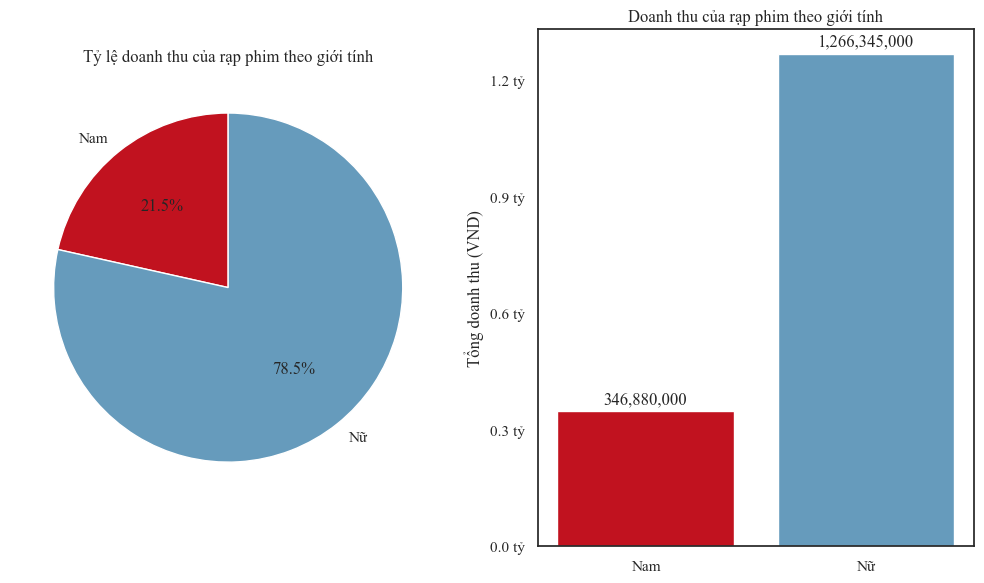

In [26]:
colors = ['#C1121F', '#669BBC']

fig, ax = plt.subplots(figsize=(10,6), ncols=2)

# Pie chart với custom màu
ax[0].pie(
    total_bysex.values, 
    labels=total_bysex.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax[0].set_title("Tỷ lệ doanh thu của rạp phim theo giới tính")

# Bar chart với cùng màu
total_bysex_bar = ax[1].bar(
    total_bysex.index, 
    total_bysex.values, 
    color=colors
)
ax[1].set_title("Doanh thu của rạp phim theo giới tính")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(300_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f} tỷ"))

# Hiển thị số tiền trên cột
ax[1].bar_label(
    total_bysex_bar, 
    labels=[f"{v:,}" for v in total_bysex.values],
    padding=3
)

plt.tight_layout()
plt.show()

#### __DOANH THU THEO HUYỆN TRONG THÀNH PHỐ ĐÀ NẴNG__

In [27]:
total_province = df_final.groupby("Quận/Huyện")['ticket price'].sum().sort_values(ascending=False)
print(total_province)

Quận/Huyện
Liên Chiểu      634345000
Sơn Trà         458655000
Hải Châu        178855000
Thanh Khê       135495000
Ngũ Hành Sơn     74490000
Cẩm Lệ           71775000
Hòa Vang         59610000
Name: ticket price, dtype: int64


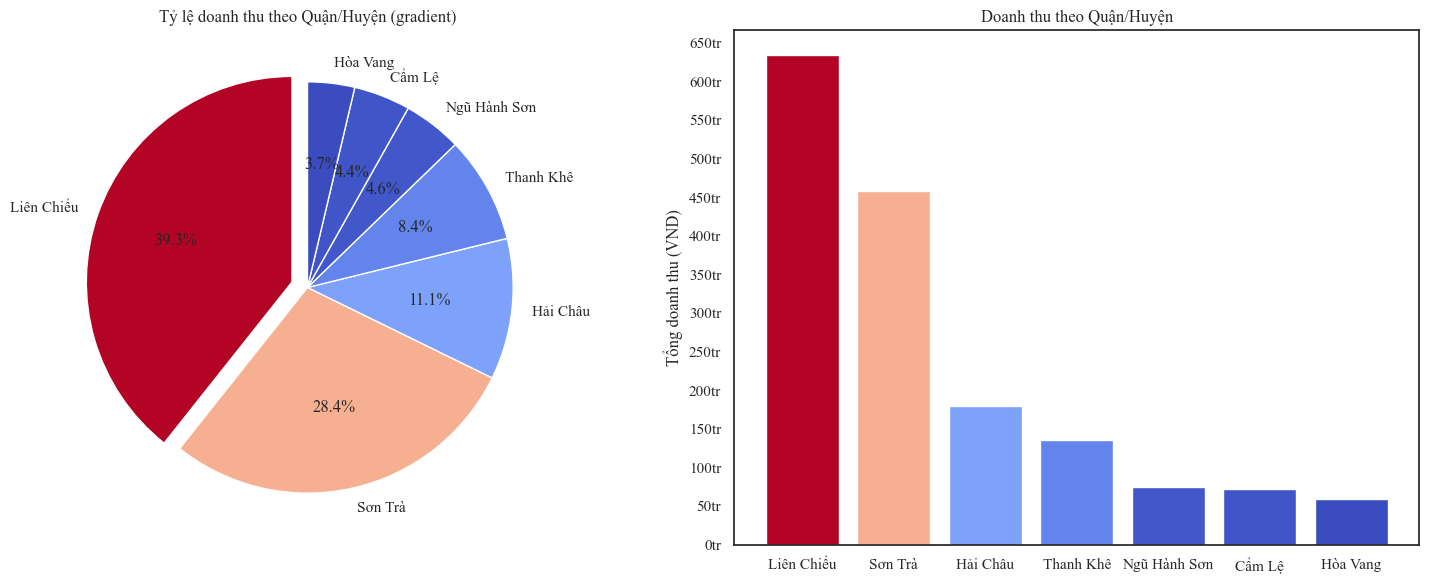

In [31]:
fig, ax = plt.subplots(figsize=(15,6), ncols=2, nrows=1)

# Normalize giá trị → màu
norm = plt.Normalize(total_province.values.min(), total_province.values.max())
colors3 = cm.coolwarm(norm(total_province.values))  # chính là gradient colormap

explode = [0.08 if v == max(total_province.values) else 0 for v in total_province.values]

# Pie chart với gradient màu
ax[0].pie(
    total_province.values, 
    labels=total_province.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors3
)
ax[0].set_title("Tỷ lệ doanh thu theo Quận/Huyện (gradient)")

# Bar chart cùng màu
total_province_bar = ax[1].bar(
    total_province.index, 
    total_province.values, 
    color=colors3
)
ax[1].set_title("Doanh thu theo Quận/Huyện")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}tr"))

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

#### __DOANH THU THEO NGÀY TRONG THÁNG 5/2019__

In [ ]:
# Nhóm theo ngày tổng doanh thu và số lượng vé
daily_summary = df_final.groupby('saledate').agg({
    'ticket price': 'sum',
    'ticketcode': 'count'
}).reset_index()

In [ ]:
# Khởi tạo màu mặc định cho tất cả các cột
custom_colors = ['#669BBC'] * len(daily_summary)

# Highlight doanh thu cao nhất → màu đỏ
custom_colors[daily_summary['ticket price'].idxmax()] = '#C1121F'  

# Highlight doanh thu thấp nhất → màu xanh
custom_colors[daily_summary['ticket price'].idxmin()] = '#C1121F'  

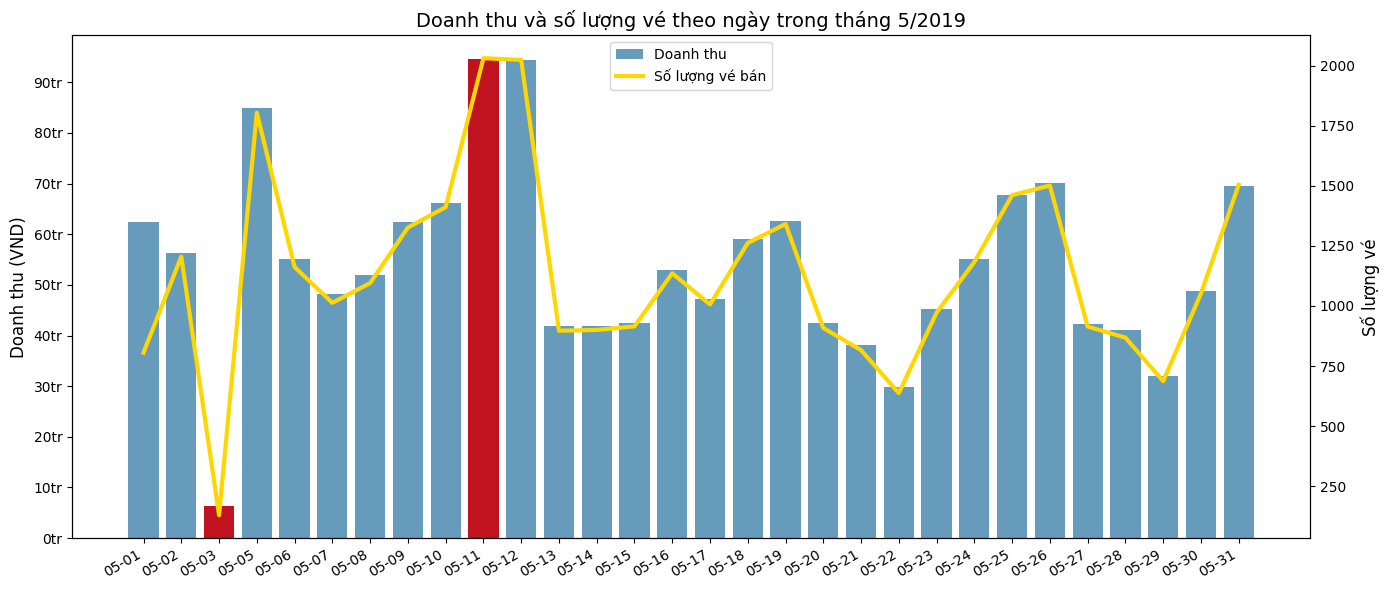

In [ ]:
 # Tạo figure và 2 trục y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Vẽ cột doanh thu
bar = ax1.bar(daily_summary['saledate'], daily_summary['ticket price'], 
              label='Doanh thu', color=custom_colors)

# Thiết lập trục y bên trái
ax1.set_ylabel('Doanh thu (VND)', fontsize=12)
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10_000_000))

# Tạo trục y bên phải
ax2 = ax1.twinx()

# Vẽ đường số vé
line = ax2.plot(daily_summary['saledate'], daily_summary['ticketcode'],
                color='gold', linewidth=3, label='Số lượng vé bán')


# Thiết lập trục y bên phải
ax2.set_ylabel('Số lượng vé', fontsize=12)
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Tiêu đề
plt.title('Doanh thu và số lượng vé theo ngày trong tháng 5/2019', fontsize=14)

# Gộp legend cả 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center')

# Format ngày cho trục x
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


#### __DOANH THU THEO PHIM__

C:\Users\Ngoc Minh\AppData\Local\Temp\ipykernel_7812\691002752.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


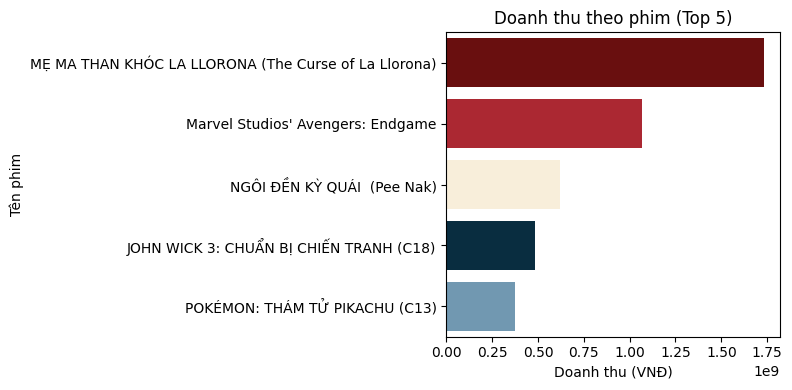

In [ ]:
# Tính số lượng vé trong mỗi hóa đơn
df_final["Số vé trong hóa đơn"] = df_final.groupby("orderid")["orderid"].transform("count")

# Giá vé cho mỗi vé bán
df_final["Giá vé"] = df_final["total"] / df_final["Số vé trong hóa đơn"]

# Doanh thu cho mỗi phim
df_final["Doanh thu"] = df_final["Giá vé"] * df_final["Số vé trong hóa đơn"]

# Tổng doanh thu theo từng phim
movie_revenue = df_final.groupby("title")["Doanh thu"].sum().reset_index()

# 5 phim có doanh thu cao nhất
movie_revenue = movie_revenue.sort_values(by="Doanh thu", ascending=False).head(5)

# Vẽ barplot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=movie_revenue, 
    x="Doanh thu", 
    y="title", 
    palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"]  # palette chuẩn màu bạn list
)
plt.title("Doanh thu theo phim (Top 5)")
plt.xlabel("Doanh thu (VNĐ)")
plt.ylabel("Tên phim")
plt.tight_layout()
plt.show()

#### __TỶ TRỌNG LƯỢNG VÉ BÁN RA THEO KÊNH BÁN__

In [ ]:
df_final['customerid']

In [ ]:
df_final[df_final['prefix'] == 'WEBS']

In [ ]:
# Tách phần chữ 'KH' và 'WEBS'
df_final['prefix'] = df_final['customerid'].str.extract(r'([A-Za-z]+)')

In [ ]:
df_final['prefix'].value_counts()

có 9 vé được bán que website => rất ít; cái này không cần visual nữa, đưa số liệu vào slide thôi

In [ ]:
9/ 39966 * 100

0.02251914127007957

#### __DOANH THU THEO LOẠI GHẾ NGỒI__

In [ ]:
total_slot_type = df_final.groupby('slot type')['ticket price'].sum()

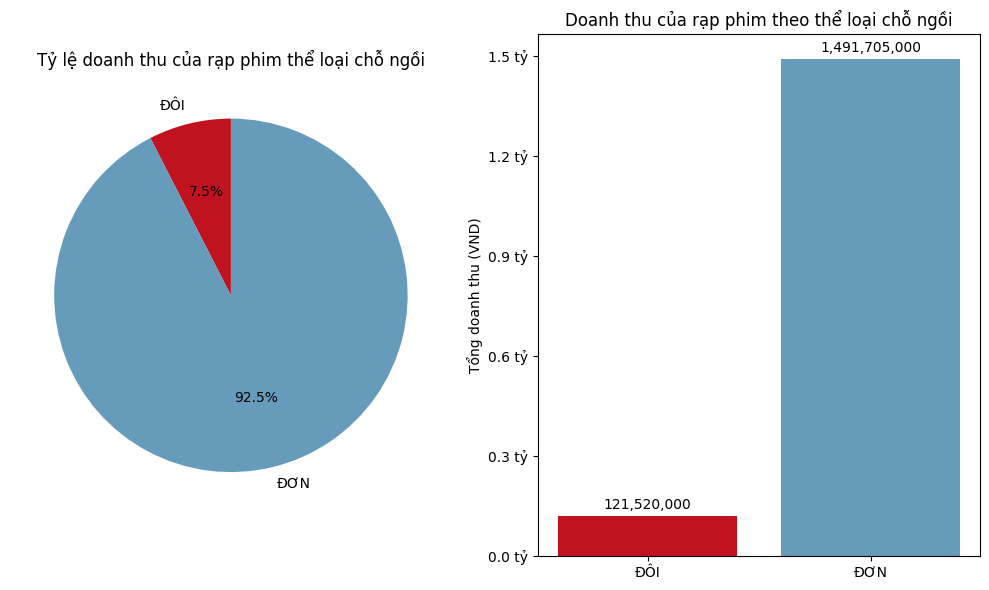

In [ ]:
colors = ['#C1121F', '#669BBC']

fig, ax = plt.subplots(figsize=(10,6), ncols=2)

# Pie chart với custom màu
ax[0].pie(
    total_slot_type.values, 
    labels=total_slot_type.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax[0].set_title("Tỷ lệ doanh thu của rạp phim thể loại chỗ ngồi")

# Bar chart với cùng màu
total_slot_type_bar = ax[1].bar(
    total_slot_type.index, 
    total_slot_type.values, 
    color=colors
)
ax[1].set_title("Doanh thu của rạp phim theo thể loại chỗ ngồi")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(300_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f} tỷ"))

# Hiển thị số tiền trên cột
ax[1].bar_label(
    total_slot_type_bar, 
    labels=[f"{v:,}" for v in total_slot_type.values],
    padding=3
)

plt.tight_layout()
plt.show()

#### __SỐ LƯỢNG VÉ THEO HÀNG GHẾ (A-K)__

In [32]:
# lấy tên hàng ghế từ A-K
df_final['slot_letter'] = df_final['slot'].str[0]  
# 17A, 17B, 17C, 17D, 17E, 17F, 17G, 17H, 19I, 16J, 19K

In [33]:
slot_ticketcode = df_final.groupby("slot_letter")['ticketcode'].count()
print(slot_ticketcode)
slot_ticketcode = slot_ticketcode.sort_values(ascending=False)

slot_letter
A     538
B    1007
C    1811
D    3497
E    5282
F    5774
G    5585
H    4455
I    3333
J    1587
K    1097
Name: ticketcode, dtype: int64


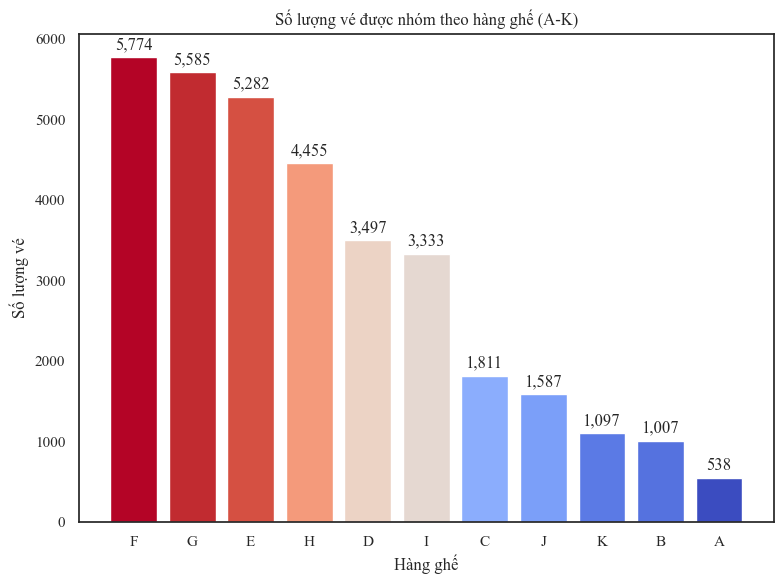

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize giá trị để ánh xạ màu
norm = plt.Normalize(slot_ticketcode.values.min(), slot_ticketcode.values.max())
colors1 = cm.coolwarm(norm(slot_ticketcode.values)) 

slot_ticketcode_barplot = ax.bar(slot_ticketcode.index, slot_ticketcode.values, color = colors1)

ax.set_title("Số lượng vé được nhóm theo hàng ghế (A-K)")
ax.set_xlabel("Hàng ghế")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.bar_label(slot_ticketcode_barplot, labels=[f"{v:,}" for v in slot_ticketcode.values], padding=3)
ax.set_ylabel("Số lượng vé")

plt.tight_layout()
plt.show()

#### __HEATMAP THỂ HIỆN SỐ LƯỢNG VÉ THEO CHỖ NGỒI__

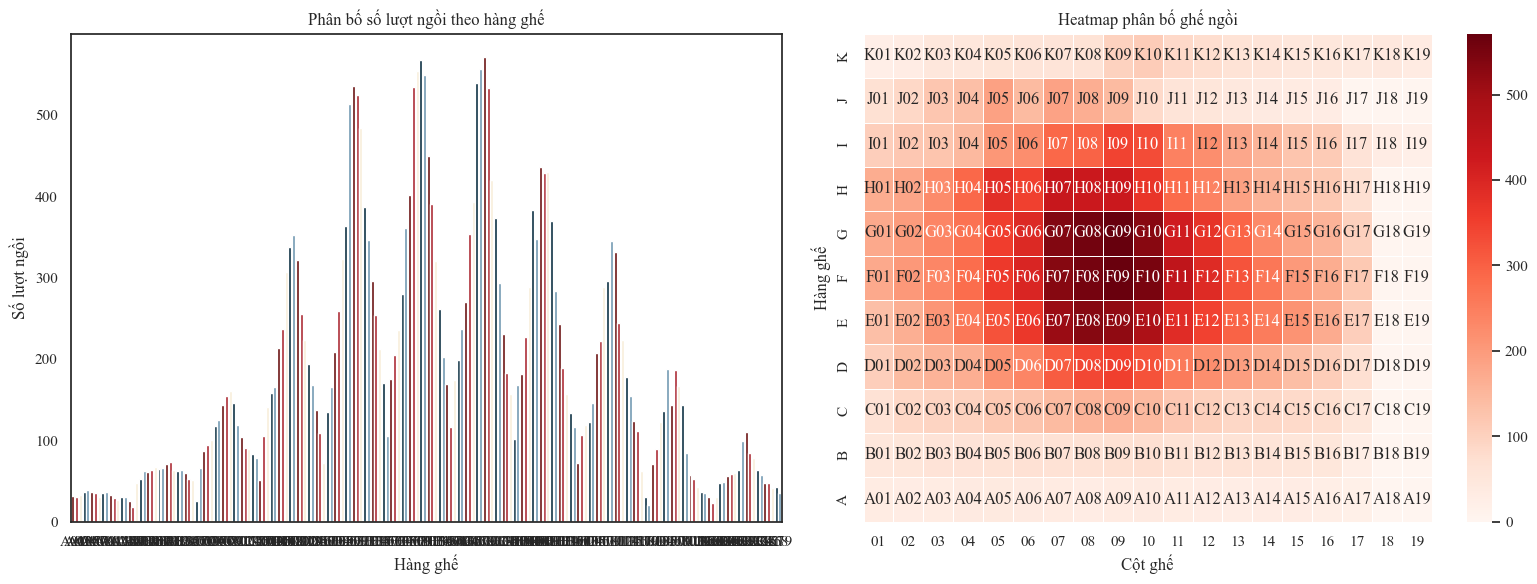

In [41]:
# Đếm số lượt theo hàng ghế
hang_counts = df_final["slot"].value_counts().sort_index()

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ barplot phân bố số lượt ngồi theo hàng ghế
sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
axes[0].set_title("Phân bố số lượt ngồi theo hàng ghế")
axes[0].set_xlabel("Hàng ghế")
axes[0].set_ylabel("Số lượt ngồi")

# Sự phân bố ghế ngồi
df_final["Hàng ghế"] = df_final["slot"].str.extract(r"([A-Z])")
df_final["Cột ghế"] = df_final["slot"].str.extract(r"(\d+)")

# Đếm số lượt ngồi theo vị trí
heatmap_data = df_final.groupby(["Hàng ghế", "Cột ghế"]).size().unstack(fill_value=0)

# Tạo bảng ghi nhãn là tên ghế (A01, B05, ...)
labels = heatmap_data.copy()
for row in labels.index:
    for col in labels.columns:
        labels.loc[row, col] = f"{row}{col}"

# Vẽ heatmap phân bố ghế ngồi
sns.heatmap(
    heatmap_data.sort_index(ascending=False),
    cmap="Reds",  # Đổi màu palette của heatmap sang sắc đỏ
    linewidths=0.5,
    annot=labels.sort_index(ascending=False),
    fmt="s", 
    ax=axes[1]
)
axes[1].set_title("Heatmap phân bố ghế ngồi")
axes[1].set_xlabel("Cột ghế")
axes[1].set_ylabel("Hàng ghế")


plt.tight_layout()
plt.show()

In [40]:
# Tạo heatmap data
heatmap_data = df_final.groupby(["Hàng ghế", "Cột ghế"]).size().unstack(fill_value=0)

# Tạo bảng nhãn cho từng ô (A01, B05, ...)
labels = heatmap_data.copy().astype(str)
for row in labels.index:
    for col in labels.columns:
        labels.loc[row, col] = f"{row}{col}"

# Tạo figure đơn
fig, ax = plt.subplots(figsize=(10, 8))

# Vẽ heatmap
sns.heatmap(
    heatmap_data.sort_index(ascending=False),
    cmap="Reds",
    linewidths=0.5,
    annot=labels.sort_index(ascending=False),
    fmt="s", 
    ax=ax
)

# Tiêu đề và nhãn trục
ax.set_title("Heatmap phân bố ghế ngồi")
ax.set_xlabel("Cột ghế")
ax.set_ylabel("Hàng ghế")

plt.tight_layout()
plt.show()

KeyError: 'Hàng ghế'

#### __TỶ LỆ LẤP ĐẦY PHÒNG THEO CÁC THỜI ĐIỂM TRONG NGÀY (SÁNG, CHIỀU, TỐI, ĐÊM) CỦA TỪNG PHÒNG (1,2,3,4) TRONG RẠP PHIM__

cái này t làm khác đi cho có visual và cụ thể các thời gian cụ thể hơn cho tỉ lệ lấp đầy

In [ ]:
total_seats_per_room = df_final.groupby('room')['slot'].nunique()
print(total_seats_per_room)
total_seats_per_room = pd.DataFrame(total_seats_per_room)

# Tính tổng số vé đã bán theo ngày, từng phòng
seats_sold = df_final.groupby(['Time of day', 'room'])['slot'].count().reset_index(name='seats_sold')

# Gộp với tổng số ghế phòng
result = pd.merge(seats_sold, total_seats_per_room, on='room', how='left')

result['fill_rate'] = result['seats_sold'] / result['slot']
result = pd.DataFrame(result)

print(result)

C:\Users\Ngoc Minh\AppData\Local\Temp\ipykernel_7812\3450904012.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))


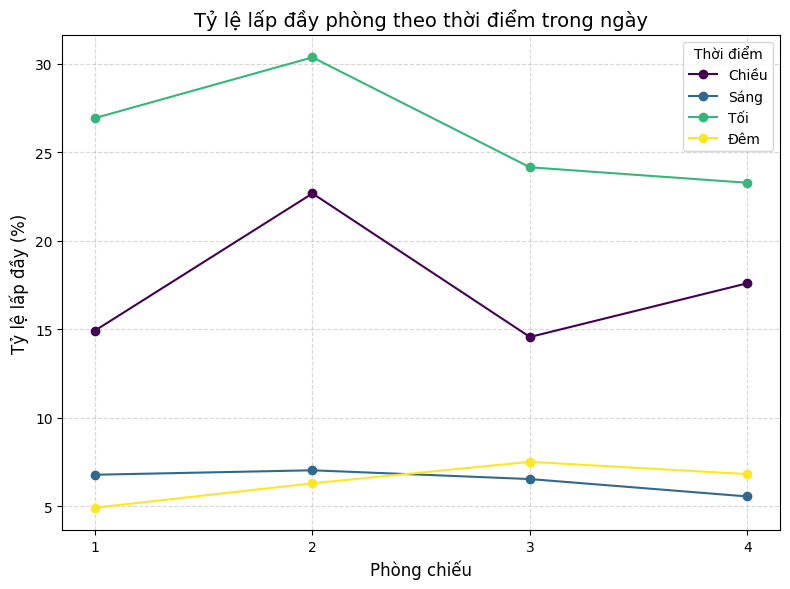

In [ ]:
# Tạo colormap theo số line
cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))

# Vẽ line chart
fig, ax = plt.subplots(figsize=(8, 6))
for idx, time in enumerate(result['Time of day'].unique()):
    sub_df = result[result['Time of day'] == time]
    ax.plot(
        sub_df['room'], sub_df['fill_rate'],
        marker='o', linestyle='-', 
        label=time,
        color=cmap(idx)  # lấy màu theo colormap
    )

ax.set_title('Tỷ lệ lấp đầy phòng theo thời điểm trong ngày', fontsize=14)
ax.set_xlabel('Phòng chiếu', fontsize=12)
ax.set_ylabel('Tỷ lệ lấp đầy (%)', fontsize=12)
ax.set_xticks([1, 2, 3, 4])
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Thời điểm')

plt.tight_layout()
plt.show()